# Import packages

In [0]:
import os
os.chdir("drive/My Drive/Colab Notebooks/mango_files")

In [3]:
# 資料處理套件
import cv2
import csv
import random
import time
import numpy as np
import pandas as pd
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import matplotlib.pyplot as plt # plt 用於顯示圖片
import seaborn as sns
sns.set()

from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras import utils as np_utils
from keras import backend as K
from keras import optimizers

# tensorflow深度學習模組套件
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [3]:
!nvidia-smi

Thu Jun 18 05:53:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Data preprocess

## Image compression

### Training

In [0]:
# train image
"""
X=[]
y=[]

Label = pd.read_csv("train.csv",encoding="utf8")
label = np.array(Label)

for i in range(len(label)):
    img = cv2.imread("C1-P1_Train/" + label[i][0] )
    res = cv2.resize(img,(224,224),interpolation=cv2.INTER_LINEAR)
    res = img_to_array(res)
    if i%50 == 0:
      print(i)
    X.append(res)    
    y.append(label[i][1])
print("Done!")

In [0]:
# training data cleaning
"""
X = np.array(X)
y = np.array(y)
X = X.astype("float32")
y = np.where(y == 'A', '0', y)
y = np.where(y == 'B', '1', y)
y = np.where(y == "C", '2', y)
y = tf.strings.to_number(y, out_type=tf.float32)
y = np_utils.to_categorical(y, num_classes = 3)
print(X.shape)
print(y.shape)

### Test

In [0]:
# test image
"""

pic_path = os.path.join("C1-P1_Test")
mango_images = os.listdir(pic_path)

X_test=[]
i = 0

for img_name in mango_images:
    i = i+1
    img = cv2.imread("C1-P1_Test/" + img_name )
    res = cv2.resize(img,(224,224),interpolation=cv2.INTER_LINEAR)
    res = img_to_array(res)
    if i%50 == 0:
      print(i)
    X_test.append(res)
print("Done!")

In [0]:
# test image w/ object detection

"""
pic_path = os.path.join("cut-test")
mango_images = os.listdir(pic_path)

X_test=[]
i = 0

for img_name in mango_images:
    i = i+1
    img = cv2.imread("cut-test/" + img_name )
    res = cv2.resize(img,(224,224),interpolation=cv2.INTER_LINEAR)
    res = img_to_array(res)
    if i%50 == 0:
      print(i)
    X_test.append(res)
print("Done!")

### Experiment w/ object detection

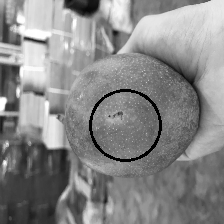

In [86]:
# Using Hough circle
"""

img = X[2]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.uint8(img)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,50,200,param1=50,param2=200,minRadius=5,maxRadius=120)

for i in circles[0,:]:
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)

cv2_imshow(img)

## Saving

### Training

In [0]:
# training data
"""
import joblib

with open('./224x224images.pickle','wb') as p:
    joblib.dump(X, p)

with open('./224x224labels.pickle','wb') as p:
    joblib.dump(y, p)

### Test

In [0]:
# test data
"""
X_test = np.array(X_test)
X_test = X_test.astype('float32')

np.save("224x224test.npy", X_test)

In [0]:
# test data w/ object detection

np.save('224x224test2.npy', X_test)
np.save('order.npy', mango_images)

## Loading

### Training

In [38]:
# train data

import joblib

with open('./224x224images.pickle', 'rb') as f:
     X = joblib.load(f)

with open('./224x224labels.pickle', 'rb') as f:
     y = joblib.load(f)


# y w/o one-hot encoding
"""
with open('./100x100labels.pickle', 'rb') as f:
     yflat = joblib.load(f)

yflat = np.array(yflat)
"""

"\nwith open('./100x100labels.pickle', 'rb') as f:\n     yflat = joblib.load(f)\n\nyflat = np.array(yflat)\n"

In [6]:
# train data w/ object detection

X_train = np.load("224x224train.npy")
image_list = np.load('image_list.npy')
Label = pd.read_csv("train.csv",encoding="utf8")

label = pd.merge(pd.DataFrame(image_list), Label, left_on = 0, right_on = 'image_id')
label = label.drop(columns=0)

y_train = np.array(label["label"])

y_train = np.where(y_train == 'A', '0', y_train)
y_train = np.where(y_train == 'B', '1', y_train)
y_train = np.where(y_train == "C", '2', y_train)
y_train = tf.strings.to_number(y_train, out_type=tf.float32)
y_train = np_utils.to_categorical(y_train, num_classes = 3)
X_train.shape


'\ny_train = np.where(y_train == \'A\', \'0\', y_train)\ny_train = np.where(y_train == \'B\', \'1\', y_train)\ny_train = np.where(y_train == "C", \'2\', y_train)\ny_train = tf.strings.to_number(y_train, out_type=tf.float32)\ny_train = np_utils.to_categorical(y_train, num_classes = 3)\nX_train.shape\n'

### Test

In [8]:
# dev data
X_dev = np.load("224x224dev.npy")

image_list_dev = np.load('image_list_dev.npy')
dev_label = pd.read_csv("dev.csv",encoding="utf8")

label_dev = pd.merge(pd.DataFrame(image_list_dev), dev_label, left_on = 0, right_on = 'image_id')
label_dev = label_dev.drop(columns=0)

y_dev = np.array(label_dev["label"])
"""
y_dev = np.where(y_dev == 'A', '0', y_dev)
y_dev = np.where(y_dev == 'B', '1', y_dev)
y_dev = np.where(y_dev == "C", '2', y_dev)
y_dev = tf.strings.to_number(y_dev, out_type=tf.float32)
y_dev = np_utils.to_categorical(y_dev, num_classes = 3)
y_dev.shape
"""

'\ny_dev = np.where(y_dev == \'A\', \'0\', y_dev)\ny_dev = np.where(y_dev == \'B\', \'1\', y_dev)\ny_dev = np.where(y_dev == "C", \'2\', y_dev)\ny_dev = tf.strings.to_number(y_dev, out_type=tf.float32)\ny_dev = np_utils.to_categorical(y_dev, num_classes = 3)\ny_dev.shape\n'

In [0]:
# test data

"""
X_test = np.load('224x224test.npy') 
pic_path = os.path.join("C1-P1_Test")
mango_images = os.listdir(pic_path)

In [0]:
# test data w/ object detection
X_test = np.load('224x224test2.npy')
mango_images = ('order.npy')
X_test = np.array(X_test)
X_test = X_test.astype('float32')

## Train test split

Should use dev data instead

In [0]:
"""

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1453)
y_test

In [0]:
# flatten X and raw y
"""
from sklearn.model_selection import train_test_split

Xflat = X.reshape(5600, 224*224*3)

xflat_train, xflat_test, yflat_train, yflat_test = train_test_split(Xflat, yflat, test_size=0.2, random_state = 1453)
yflat_test

array(['A', 'A', 'A', ..., 'A', 'B', 'C'], dtype='<U1')

In [4]:
# X and raw y 
"""
from sklearn.model_selection import train_test_split

X_train, X_test, yflat_train, yflat_test = train_test_split(X, yflat, test_size=0.2, random_state=1453)
yflat_test

array(['A', 'A', 'A', ..., 'A', 'B', 'C'], dtype='<U1')

## Label distribution

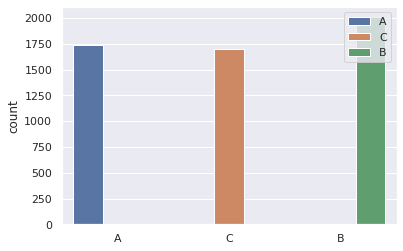

In [0]:
sns.set()
sns.countplot(y_train, hue = y_train)

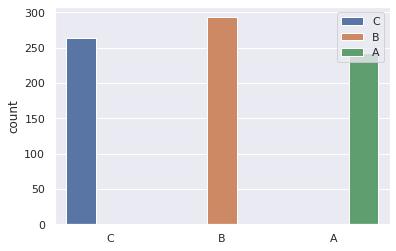

In [22]:
sns.countplot(y_dev, hue = y_dev)

## Data augmenting

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
                             )

datagen.fit(X_train)

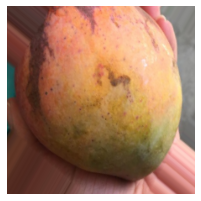

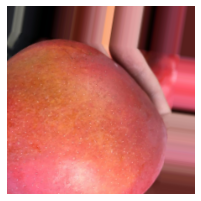

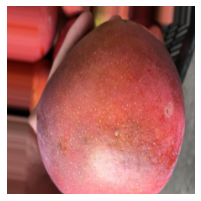

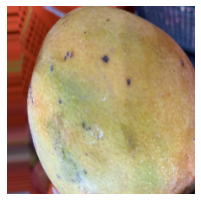

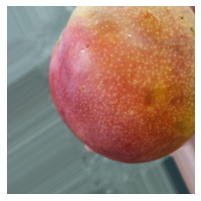

In [28]:
i = 0

for batch in datagen.flow(X_train, batch_size=10):
    plt.figure(figsize=(20,20))
    plt.subplot(5,1,i +1)
    plt.axis("off")
    augImage = batch[0]
    augImage = augImage.astype('float32')
    augImage /= 255
    plt.imshow(augImage[:,:,::-1])
    i = i + 1
    if i > 4:
        break

# 1. Manual CNN

## Model

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

opt = keras.optimizers.SGD(lr=0.0001)
model.compile(loss='categorical_crossentropy',
optimizer=opt,
metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_17 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 64)       

### Training

In [9]:
# w/ data augmentation
epochs = 100

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=epochs)

Epoch 1/100
170/169 [==============================] - 65s 385ms/step - loss: 1.8974 - accuracy: 0.3874
Epoch 2/100
170/169 [==============================] - 64s 379ms/step - loss: 1.0498 - accuracy: 0.4004
Epoch 3/100
170/169 [==============================] - 64s 376ms/step - loss: 1.0313 - accuracy: 0.4172
Epoch 4/100
170/169 [==============================] - 64s 379ms/step - loss: 1.0170 - accuracy: 0.4370
Epoch 5/100
170/169 [==============================] - 65s 380ms/step - loss: 1.0068 - accuracy: 0.4567
Epoch 6/100
170/169 [==============================] - 64s 376ms/step - loss: 1.0040 - accuracy: 0.4517
Epoch 7/100
170/169 [==============================] - 65s 383ms/step - loss: 0.9943 - accuracy: 0.4569
Epoch 8/100
170/169 [==============================] - 65s 384ms/step - loss: 0.9985 - accuracy: 0.4505
Epoch 9/100
170/169 [==============================] - 65s 384ms/step - loss: 0.9877 - accuracy: 0.4648
Epoch 10/100
170/169 [==============================] - 65s 383m

KeyboardInterrupt: ignored

In [0]:
CB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
epochs = 25
batch_size = 16

history = model.fit(
    x = X_train , y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = 0.2
    ,callbacks = [CB]
)

### Evaluating

In [0]:
#model.evaluate(X_test, y_test, batch_size=32)

1120/1120 [==============================] - 1s 1ms/step


[0.6114764366831098, 0.7464285492897034]

In [0]:
model.save('manual_mango.h5') 

In [0]:
model.evaluate(X_dev, y_dev, batch_size=32)

## Learning curve

In [0]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(-0.2,1.5)
    plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


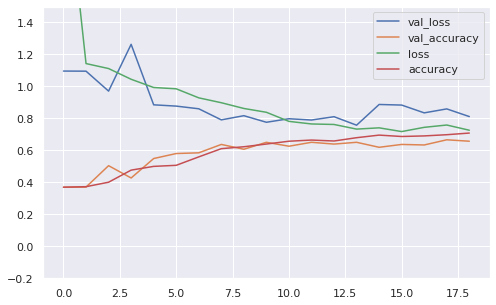

In [0]:
plot_learning_curves(history)

## Predict

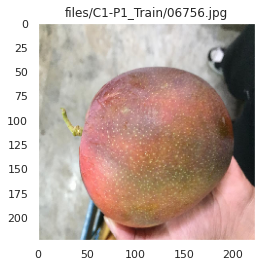

In [0]:
num = random.randint(0,len(y_test))

print(model.predict(test_features)[num])
print(y_test[num])
plt.grid(False)
plt.imshow(X_test[num][:,:,::-1]/255)

# 2. VGG16 as feature extractor

## Feature extraction

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [10]:
features = model.predict(X_train)
features.shape

(5439, 7, 7, 512)

## Top model

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import regularizers
top_model = Sequential()
top_model.add(Flatten(input_shape=features.shape[1:]))
top_model.add(Dropout(0.2))
#top_model.add(BatchNormalization())
top_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
top_model.add(Dropout(0.2))
top_model.add(BatchNormalization())
top_model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

CB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

opt = keras.optimizers.SGD(lr=0.0001)
top_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'], )
top_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 6,424,579
Trainable params: 6,424,067
Non-trainable params: 512
__________________________________________

### Training

In [166]:
top_model.fit(features, y_train, epochs=25, batch_size=16, validation_split=0.2
              ,callbacks = [CB]
              )

Train on 4351 samples, validate on 1088 samples
Epoch 1/25
4351/4351 [==============================] - 3s 797us/step - loss: 4.0907 - accuracy: 0.9524 - val_loss: 4.6463 - val_accuracy: 0.6958
Epoch 2/25
4351/4351 [==============================] - 3s 761us/step - loss: 4.0928 - accuracy: 0.9485 - val_loss: 4.6408 - val_accuracy: 0.7022
Epoch 3/25
4351/4351 [==============================] - 3s 753us/step - loss: 4.0840 - accuracy: 0.9527 - val_loss: 4.6382 - val_accuracy: 0.7004
Epoch 4/25
4351/4351 [==============================] - 3s 751us/step - loss: 4.0811 - accuracy: 0.9527 - val_loss: 4.6355 - val_accuracy: 0.6976
Epoch 5/25
4351/4351 [==============================] - 3s 744us/step - loss: 4.0795 - accuracy: 0.9432 - val_loss: 4.6302 - val_accuracy: 0.6967
Epoch 6/25
4351/4351 [==============================] - 3s 733us/step - loss: 4.0705 - accuracy: 0.9515 - val_loss: 4.6242 - val_accuracy: 0.7013
Epoch 7/25
4351/4351 [==============================] - 3s 727us/step - loss

### Evaluation

No object detection

In [0]:
# using validation set

#test_features = model.predict(X_test)
top_model.evaluate(test_features, y_test)

1120/1120 [==============================] - 0s 194us/step


[4.991580745152064, 0.7160714268684387]

W/ object detection

In [167]:
# using dev set

#dev_features = model.predict(X_dev)
top_model.evaluate(dev_features, y_dev)

800/800 [==============================] - 0s 210us/step


[4.463390483856201, 0.75]

In [0]:
# save model
top_model.save('vgg16Top_mango.h5') 

In [0]:
# load model
top_model = keras.models.load_model('vgg16Top_mango.h5')

## Predict

No object detection

[0.00883551 0.0526941  0.9384704 ]
[0. 0. 1.]


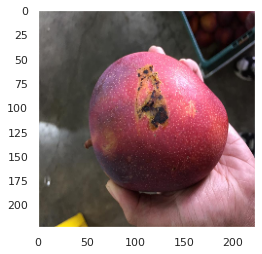

In [0]:
num = random.randint(0,len(y_test))

print(top_model.predict(test_features)[num])
print(y_test[num])
plt.grid(False)
plt.imshow(X_test[num][:,:,::-1]/255)

W/ object detection

622
[0.2753355  0.7075763  0.01708826]
[0. 1. 0.]


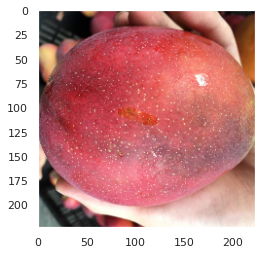

In [125]:
num = random.randint(0,len(y_dev))
print(num)

print(top_model.predict(dev_features)[num])
print(y_dev[num])
plt.grid(False)
plt.imshow(X_dev[num][:,:,::-1]/255)

Object detection on the test set

1062
[0.19670902 0.73263067 0.0706603 ]


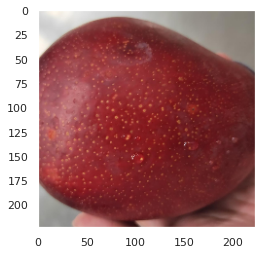

In [164]:
num = random.randint(0,len(X_test))
print(num)

print(top_model.predict(test_feature)[num])
plt.grid(False)
plt.imshow(X_test[num][:,:,::-1]/255)

## Predict w/ test data

In [155]:
test_feature = model.predict(X_test)
y_pred = top_model.predict(test_feature)

result = y_pred.argmax(axis = 1)

result = np.where(result == 0, 'A', result)
result = np.where(result == '1', 'B', result)
result = np.where(result == '2', 'C', result)

result

array(['C', 'B', 'C', ..., 'B', 'C', 'C'], dtype='<U21')

In [0]:
Result = pd.concat([pd.DataFrame(mango_images), pd.DataFrame(result)], axis = 1)
Result.columns = ['image_id', 'label']
Result = Result.sort_values('image_id')
Result.to_csv('result2.csv', index=False)

# 3. VGG16 w/ fine tuning

In [10]:
from keras import Model, regularizers
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

inputs = model.input

top = Flatten(input_shape=[7, 7, 512])(model.get_output_at(-1))
top = Dropout(0.2)(top)
top = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(top)
top = Dropout(0.2)(top)
top = BatchNormalization()(top)
top = Dense(3, activation='softmax',  kernel_regularizer=regularizers.l2(0.01))(top)

vgg16 = Model(inputs=inputs, outputs=top)

for layer in vgg16.layers[:19]:
  layer.trainable = False

vgg16.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
vgg16.compile(loss='categorical_crossentropy',
optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
metrics=['accuracy'])

## Training

In [8]:
# w/ data augmentation

epochs = 25

history = vgg16.fit_generator(datagen.flow(X_train, y_train, batch_size=16),
                    steps_per_epoch=len(X_train) / 16, epochs=epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
340/339 [==============================] - 82s 240ms/step - loss: 1.9588 - accuracy: 0.7318
Epoch 2/25
340/339 [==============================] - 80s 235ms/step - loss: 1.9433 - accuracy: 0.7376
Epoch 3/25
340/339 [==============================] - 80s 235ms/step - loss: 1.9389 - accuracy: 0.7196
Epoch 4/25
340/339 [==============================] - 80s 235ms/step - loss: 1.9195 - accuracy: 0.7297
Epoch 5/25
340/339 [==============================] - 80s 235ms/step - loss: 1.8974 - accuracy: 0.7340
Epoch 6/25
340/339 [==============================] - 80s 235ms/step - loss: 1.8831 - accuracy: 0.7253
Epoch 7/25
340/339 [==============================] - 80s 235ms/step - loss: 1.8662 - accuracy: 0.7301
Epoch 8/25
340/339 [==============================] - 80s 235ms/step - loss: 1.8573 - accuracy: 0.7242
Epoch 9/25
340/339 [==============================] - 80s 235ms/step - loss: 1.8376 - accuracy: 0.72

In [0]:
vgg16.fit(X_train, y_train, epochs=25, batch_size=16, validation_split=0.2
#              ,callbacks = [CB]
)

No object detection

In [0]:
#save model
vgg16.save('vgg16_mango.h5') 

In [0]:
vgg16 = keras.models.load_model('vgg16_mango.h5')

Object detection

In [0]:
#save model
vgg16.save('vgg16_mango_cut.h5') 

In [0]:
vgg16 = keras.models.load_model('vgg16_mango_cut.h5')

## Evaluating

In [0]:
#w/o object detection
print(vgg16.evaluate(X_test, y_test))
pred = vgg16.predict(X_test)

1120/1120 [==============================] - 10s 9ms/step
[1.235667279788426, 0.7446428537368774]


In [12]:
#w/ object detection
vgg16.evaluate(X_dev, y_dev)

25/25 [==============================] - 7s 268ms/step - loss: 1.9317 - accuracy: 0.7850


[1.9317398071289062, 0.7850000262260437]

##Predict

[0.00304303 0.03164731 0.96530974]
[0. 0. 1.]


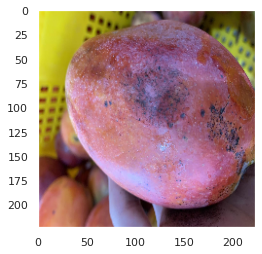

In [0]:
num = random.randint(0,len(y_test))

print(pred[num])
print(y_test[num])
plt.grid(False)
plt.imshow(X_test[num][:,:,::-1]/255)

## Predict w/ test data

In [0]:
y_pred = vgg16.predict(X_test)

In [12]:
result = y_pred.argmax(axis = 1)

result = np.where(result == 0, 'A', result)
result = np.where(result == '1', 'B', result)
result = np.where(result == '2', 'C', result)

result

array(['B', 'B', 'A', ..., 'B', 'A', 'B'], dtype='<U21')

[0.06493878 0.0929855  0.8420757 ]


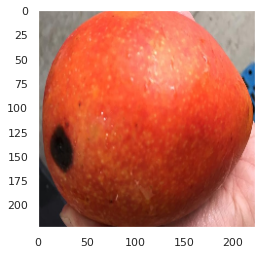

In [13]:
num = random.randint(0,len(X_test))

print(y_pred[num])
plt.grid(False)
plt.imshow(X_test[num][:,:,::-1]/255)

In [0]:
Result = pd.concat([pd.DataFrame(mango_images), pd.DataFrame(result)], axis = 1)
Result.columns = ['image_id', 'label']
Result = Result.sort_values('image_id')
Result.to_csv('result.csv', index=False)

# 4. ResNet as feature extractor

## Feature extraction

In [0]:
from keras.applications.resnet50 import ResNet50

resnet = ResNet50(weights='imagenet', include_top=False)
features = resnet.predict(X_train)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 14s 0us/step


In [0]:
features.shape

(4480, 7, 7, 2048)

## Top model

In [0]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras import regularizers
res_top = Sequential()
res_top.add(Flatten(input_shape=features.shape[1:]))
res_top.add(Dropout(0.2))
#res_top.add(BatchNormalization())
res_top.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
res_top.add(Dropout(0.2))
res_top.add(BatchNormalization())
res_top.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

CB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

opt = keras.optimizers.SGD(lr=0.0001)
res_top.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'], )
res_top.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 100352)            0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 771       
Total params: 25,692,163
Trainable params: 25,691,651
Non-trainable params: 512
_______________________________________

## Training

In [0]:
res_top.fit(features, y_train, epochs=50, batch_size=16, validation_split=0.2
#              ,callbacks = [CB]
              )

Train on 3584 samples, validate on 896 samples
Epoch 1/50
3584/3584 [==============================] - 6s 2ms/step - loss: 6.2764 - accuracy: 0.5321 - val_loss: 5.9115 - val_accuracy: 0.6920
Epoch 2/50
3584/3584 [==============================] - 6s 2ms/step - loss: 6.0131 - accuracy: 0.6445 - val_loss: 5.8605 - val_accuracy: 0.7065
Epoch 3/50
3584/3584 [==============================] - 6s 2ms/step - loss: 5.9099 - accuracy: 0.6869 - val_loss: 5.8251 - val_accuracy: 0.7254
Epoch 4/50
3584/3584 [==============================] - 6s 2ms/step - loss: 5.8323 - accuracy: 0.7171 - val_loss: 5.8354 - val_accuracy: 0.7188
Epoch 5/50
3584/3584 [==============================] - 6s 2ms/step - loss: 5.7777 - accuracy: 0.7427 - val_loss: 5.8253 - val_accuracy: 0.7109
Epoch 6/50
3584/3584 [==============================] - 6s 2ms/step - loss: 5.7264 - accuracy: 0.7500 - val_loss: 5.8167 - val_accuracy: 0.7188
Epoch 7/50
3584/3584 [==============================] - 6s 2ms/step - loss: 5.6855 - accu

## Evaluation

In [0]:
pred = res_top.predict(resnet.predict(X_test))
res_top.evaluate(resnet.predict(X_test), y_test)

1120/1120 [==============================] - 0s 374us/step


[5.645782334463937, 0.7357142567634583]

## Predict

[9.7493792e-04 5.2245497e-03 9.9380058e-01]
[0. 0. 1.]


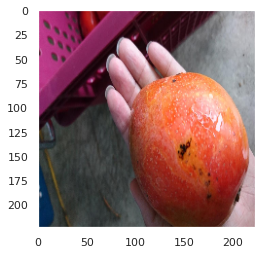

In [0]:
num = random.randint(0,len(y_test))

print(pred[num])
print(y_test[num])
plt.grid(False)
plt.imshow(X_test[num][:,:,::-1]/255)

# 5. Extra Tree

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

## Training

In [19]:
extra_tree = ExtraTreesClassifier(n_jobs = -1, verbose = 1)
extra_tree.fit(X_train.reshape(5439, -1), y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   47.9s finished


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=1,
                     warm_start=False)

## Evaluation

In [0]:
#No object detection
extra_tree.score(xflat_test, yflat_test)

0.6767857142857143

In [20]:
#w/ object detection
extra_tree.score(X_dev.reshape(800, -1), y_dev)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


0.65875

## Predict

In [0]:
pred = extra_tree.predict(xflat_test)

predict:  B
true:  B


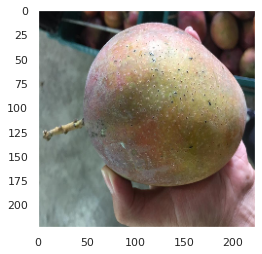

In [0]:
num = random.randint(0,len(yflat_test))

print("predict: ", pred[num])
print("true: ", yflat_test[num])
plt.grid(False)
img = xflat_test[num].reshape(224, 224, 3)
img = img[:,:,::-1]/255
plt.imshow(img)

# 6. VGG16 w/ extra tree

## Feature extraction

In [0]:
from keras.applications.vgg16 import VGG16
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [0]:
features = model.predict(X_train)
feature_flat = features.reshape(-1, 7*7*512)
print(feature_flat.shape)

(4480, 7, 7, 512)

## Training

In [0]:
extra_top = ExtraTreesClassifier()
extra_top.fit(feature_flat, yflat_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

## Evaluating

In [0]:
test_feature_flat = model.predict(X_test).reshape(-1, 7*7*512)
extra_top.score(test_feature_flat, yflat_test)

0.7

## Predict

In [0]:
pred = extra_top.predict(test_feature_flat)

predict:  A
true:  A


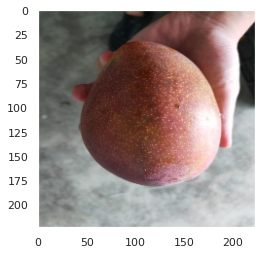

In [0]:
num = random.randint(0,len(yflat_test))

print("predict: ", pred[num])
print("true: ", yflat_test[num])
plt.grid(False)
img = X_train[num]
img = img[:,:,::-1]/255
plt.imshow(img)

# 7. ResNet w/ extra tree

## Feature extraction

In [0]:
from keras.applications.resnet50 import ResNet50
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

model = ResNet50(weights='imagenet', include_top=False)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
features = model.predict(X_train)
feature_flat = features.reshape(-1, 7*7*2048)
print(feature_flat.shape)

(4480, 100352)


In [0]:
extra_top2 = ExtraTreesClassifier()
extra_top2.fit(feature_flat, yflat_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

## Evaluating

In [0]:
test_feature_flat = model.predict(X_test).reshape(-1, 7*7*2048)
extra_top2.score(test_feature_flat, yflat_test)

0.7142857142857143

## Predict

In [0]:
pred = extra_top2.predict(test_feature_flat)

predict:  B
true:  B


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


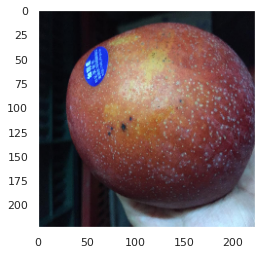

In [0]:
num = random.randint(0,len(yflat_test))

print("predict: ", pred[num])
print("true: ", yflat_test[num])
plt.grid(False)
img = X_train[num]
img = img[:,:,::-1]/255
plt.imshow(img)